# Calculations for retrospective cohorts
We perform calculations explicitly mentioned in or related to the paper's section titled, "Evaluating expanded molecular profiling and actionability in two retrospective cohorts"

In [1]:
import pandas as pd
import glob as glob

redact_germline = True

## Load MOAlmanac outputs

In [2]:
df = pd.read_csv('retrospective.actionability.txt', sep='\t')
if redact_germline:
    df = df[~df['feature_type'].eq('Germline')]
df.head()

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
0,KIRP-2K-A9WE,AR.p.QQQQQ73del.Germline,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Germline,AR Germline
1,KIRP-2K-A9WE,ASXL1.Amplification,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,ASXL1 Amp
2,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
3,KIRP-2K-A9WE,COSMIC Signature 12,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Mutational signature,COSMIC Signature 12
4,KIRP-2K-A9WE,COSMIC Signature 4,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 4


In [3]:
df['almanac_bin'].value_counts()

Biologically Relevant        2519
Investigate Actionability    1439
Putatively Actionable         563
Name: almanac_bin, dtype: int64

In [4]:
df['phial_bin'].value_counts()

Biologically Relevant        924
Investigate Actionability    657
Putatively Actionable         81
Name: phial_bin, dtype: int64

In [5]:
df['cohort'].value_counts()

MEL     2113
SU2C    1700
KIRP     810
OS       468
Name: cohort, dtype: int64

## How many patients had > 0 events

In [6]:
idx_almanac = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_phial = df['phial_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_mel = df['cohort'].eq('MEL')
idx_su2c = df['cohort'].eq('SU2C')
idx_kirp = df['cohort'].eq('KIRP')
idx_os = df['cohort'].eq('OS')

n_almanac_mel = df[idx_almanac & idx_mel]['patient_id'].drop_duplicates().shape[0]
n_almanac_su2c = df[idx_almanac & idx_su2c]['patient_id'].drop_duplicates().shape[0]
n_almanac_kirp = df[idx_almanac & idx_kirp]['patient_id'].drop_duplicates().shape[0]
n_almanac_os = df[idx_almanac & idx_os]['patient_id'].drop_duplicates().shape[0]
n_phial_mel = df[idx_phial & idx_mel]['patient_id'].drop_duplicates().shape[0]
n_phial_su2c = df[idx_phial & idx_su2c]['patient_id'].drop_duplicates().shape[0]
n_phial_kirp = df[idx_phial & idx_kirp]['patient_id'].drop_duplicates().shape[0]
n_phial_os = df[idx_phial & idx_os]['patient_id'].drop_duplicates().shape[0]

print('Almanac')
print('Mel', n_almanac_mel, n_almanac_mel/110)
print('SU2C', n_almanac_su2c, n_almanac_su2c/150)
print('KIRP', n_almanac_kirp, n_almanac_kirp/100)
print('OS', n_almanac_os, n_almanac_os/59)
print('')
print('PHIAL')
print('Mel', n_phial_mel, n_phial_mel/110)
print('SU2C', n_phial_su2c, n_phial_su2c/150)
print('KIRP', n_phial_kirp, n_phial_kirp/100)
print('OS', n_phial_os, n_phial_os/59)

Almanac
Mel 110 1.0
SU2C 149 0.9933333333333333
KIRP 85 0.85
OS 51 0.864406779661017

PHIAL
Mel 101 0.9181818181818182
SU2C 131 0.8733333333333333
KIRP 27 0.27
OS 36 0.6101694915254238


## How many somatic variants and copy number alterations were called

In [7]:
idx_v = df['feature_type'].eq('Somatic variant')
idx_cn = df['feature_type'].eq('Somatic copy number')
idx_a = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_b = df['almanac_bin'].eq('Biologically Relevant')

idx = (idx_a) & (idx_v | idx_cn)
tmp = df[idx]
print(tmp.shape)
tmp.head()

(1445, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
2,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
7,KIRP-2K-A9WE,TPX2.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,NaN,Preclinical,NaN,Somatic copy number,TPX2 Amp
9,KIRP-2Z-A9J1,BRAF.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,Clinical evidence,NaN,NaN,Somatic copy number,BRAF Amp
11,KIRP-2Z-A9J1,DNMT3A.p.Q350fs,Investigate Actionability,Biologically Relevant,2,KIRP,NaN,NaN,Guideline,NaN,Somatic variant,DNMT3A
15,KIRP-2Z-A9J1,MET.Amplification,Putatively Actionable,NaN,1,KIRP,Guideline,Guideline,NaN,NaN,Somatic copy number,MET Amp


In [8]:
print(tmp['phial_bin'].value_counts().loc[['Putatively Actionable', 'Investigate Actionability']].sum())
tmp['phial_bin'].value_counts().loc[['Putatively Actionable', 'Investigate Actionability']]

453


Putatively Actionable         79
Investigate Actionability    374
Name: phial_bin, dtype: int64

In [9]:
n_almanac_pa_ia = tmp['almanac_bin'].value_counts().sum()
n_almanac_phial_pa_ia = tmp['phial_bin'].value_counts().loc[['Putatively Actionable', 'Investigate Actionability']].sum()
fraction_almanac_phial_pa_ia = (n_almanac_phial_pa_ia / n_almanac_pa_ia)*100
n_almanac_phial_br = tmp['phial_bin'].value_counts().loc['Biologically Relevant']

In [10]:
f"Of the {n_almanac_pa_ia} somatic variants and copy number alterations noted by MOAlmanac, \
{n_almanac_phial_pa_ia} ({fraction_almanac_phial_pa_ia}%) were highlighted for putative actionability or \
investigate actionability by PHIAL, with an additional {n_almanac_phial_br} noted by PHIAL for biological relevance."

'Of the 1445 somatic variants and copy number alterations noted by MOAlmanac, 453 (31.349480968858128%) were highlighted for putative actionability or investigate actionability by PHIAL, with an additional 390 noted by PHIAL for biological relevance.'

## Restricting considered features
Features considered: Somatic variants, copy number alterations  
Evidence considered: FDA-approved, clinical trials, or clinical evidence  
Matches considered: First putatively actionable and then also investigate actionability

In [11]:
feature_types = ['Somatic variant', 'Somatic copy number']
evidence_types = ['FDA-Approved', 'Guideline', 'Clinical trial', 'Clinical evidence']
idx_match = df['almanac_bin'].fillna('').isin(['Putatively Actionable'])
idx_features = df['feature_type'].isin(feature_types)
idx_evidence_s = df['sensitive_predictive_implication'].isin(evidence_types)
idx_evidence_r = df['resistance_predictive_implication'].isin(evidence_types)
idx_evidence_p = df['prognostic_predictive_implication'].isin(evidence_types)

tmp = df[idx_match & idx_features & (idx_evidence_s | idx_evidence_r | idx_evidence_p)]
print(tmp.shape)
tmp

(412, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
9,KIRP-2Z-A9J1,BRAF.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,Clinical evidence,NaN,NaN,Somatic copy number,BRAF Amp
15,KIRP-2Z-A9J1,MET.Amplification,Putatively Actionable,NaN,1,KIRP,Guideline,Guideline,NaN,NaN,Somatic copy number,MET Amp
72,KIRP-2Z-A9JD,BRAF.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,Clinical evidence,NaN,NaN,Somatic copy number,BRAF Amp
76,KIRP-2Z-A9JD,EGFR.Amplification,Putatively Actionable,NaN,1,KIRP,Clinical evidence,NaN,NaN,NaN,Somatic copy number,EGFR Amp
80,KIRP-2Z-A9JD,MET.Amplification,Putatively Actionable,NaN,1,KIRP,Guideline,Guideline,NaN,NaN,Somatic copy number,MET Amp
...,...,...,...,...,...,...,...,...,...,...,...,...
5070,TP_2061,PIK3CA.Amplification,Putatively Actionable,Investigate Actionability,2,SU2C,Clinical trial,NaN,NaN,NaN,Somatic copy number,PIK3CA Amp
5071,TP_2061,PTEN.Deletion,Putatively Actionable,Investigate Actionability,2,SU2C,Preclinical,Clinical evidence,NaN,NaN,Somatic copy number,PTEN Del
5072,TP_2061,RB1.Deletion,Putatively Actionable,Investigate Actionability,2,SU2C,NaN,NaN,Guideline,NaN,Somatic copy number,RB1 Del
5077,TP_2061,TP53.Deletion,Putatively Actionable,Investigate Actionability,2,SU2C,NaN,NaN,Guideline,NaN,Somatic copy number,TP53 Del


In [12]:
pa_patients = tmp['patient_id'].drop_duplicates()

In [13]:
n_events = tmp.shape[0]
n_patients = pa_patients.shape[0]
n_patients_mel = tmp[tmp['cohort'].eq('MEL')]['patient_id'].drop_duplicates().shape[0]
n_patients_su2c = tmp[tmp['cohort'].eq('SU2C')]['patient_id'].drop_duplicates().shape[0]
n_patients_kirp = tmp[tmp['cohort'].eq('KIRP')]['patient_id'].drop_duplicates().shape[0]
n_patients_os = tmp[tmp['cohort'].eq('OS')]['patient_id'].drop_duplicates().shape[0]
n_phial = tmp['phial_bin'].dropna().shape[0]
frac = round((n_phial / n_events)*100, 2)
tmp['phial_bin'].value_counts()

Investigate Actionability    167
Putatively Actionable         60
Name: phial_bin, dtype: int64

In [14]:
f"MOAlmanac identified {n_events} such putatively actionable events from {n_patients} ({n_patients_mel} melanoma, \
{n_patients_su2c} mCRPC, {n_patients_kirp} KIRP, {n_patients_os} OS), {n_phial} ({frac}%) of which were flagged by PHIAL for clinical relevance"

'MOAlmanac identified 412 such putatively actionable events from 253 (73 melanoma, 118 mCRPC, 37 KIRP, 25 OS), 227 (55.1%) of which were flagged by PHIAL for clinical relevance'

In [15]:
for label, group in tmp.groupby('cohort'):
    print(label)
    print(group['feature_string'].value_counts().head())
    print('')

KIRP
MET.Amplification       18
BRAF.Amplification      16
EGFR.Amplification      16
ERBB2.Amplification      5
PIK3CA.Amplification     3
Name: feature_string, dtype: int64

MEL
BRAF.p.V600E         39
PTEN.Deletion         9
MET.Amplification     9
NRAS.p.Q61R           8
NRAS.p.Q61L           7
Name: feature_string, dtype: int64

OS
RB1.Deletion          12
TP53.Deletion          8
MYC.Amplification      5
PTEN.Deletion          3
CDK4.Amplification     3
Name: feature_string, dtype: int64

SU2C
AR.Amplification     82
PTEN.Deletion        40
RB1.Deletion         21
MYC.Amplification    14
TP53.Deletion        10
Name: feature_string, dtype: int64



In [16]:
feature_types = ['Somatic variant', 'Somatic copy number']
evidence_types = ['FDA-Approved', 'Guideline', 'Clinical trial', 'Clinical evidence']
idx_match = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_features = df['feature_type'].isin(feature_types)
idx_evidence_s = df['sensitive_predictive_implication'].isin(evidence_types)
idx_evidence_r = df['resistance_predictive_implication'].isin(evidence_types)
idx_evidence_p = df['prognostic_predictive_implication'].isin(evidence_types)

tmp = df[idx_match & idx_features & (idx_evidence_s | idx_evidence_r | idx_evidence_p)]
print(tmp.shape)
tmp

(1180, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
9,KIRP-2Z-A9J1,BRAF.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,Clinical evidence,NaN,NaN,Somatic copy number,BRAF Amp
11,KIRP-2Z-A9J1,DNMT3A.p.Q350fs,Investigate Actionability,Biologically Relevant,2,KIRP,NaN,NaN,Guideline,NaN,Somatic variant,DNMT3A
15,KIRP-2Z-A9J1,MET.Amplification,Putatively Actionable,NaN,1,KIRP,Guideline,Guideline,NaN,NaN,Somatic copy number,MET Amp
20,KIRP-2Z-A9J2,ARID1A.p.CP1657fs,Investigate Actionability,NaN,1,KIRP,Preclinical,NaN,Clinical evidence,NaN,Somatic variant,ARID1A
22,KIRP-2Z-A9J2,BCR.p.E306D,Investigate Actionability,NaN,1,KIRP,NaN,Clinical evidence,NaN,NaN,Somatic variant,BCR
...,...,...,...,...,...,...,...,...,...,...,...,...
5072,TP_2061,RB1.Deletion,Putatively Actionable,Investigate Actionability,2,SU2C,NaN,NaN,Guideline,NaN,Somatic copy number,RB1 Del
5077,TP_2061,TP53.Deletion,Putatively Actionable,Investigate Actionability,2,SU2C,NaN,NaN,Guideline,NaN,Somatic copy number,TP53 Del
5080,TP_2064,AR.Amplification,Putatively Actionable,Investigate Actionability,2,SU2C,Guideline,Guideline,NaN,NaN,Somatic copy number,AR Amp
5085,TP_2064,BLM.p.V54I,Investigate Actionability,NaN,1,SU2C,NaN,NaN,Clinical evidence,NaN,Somatic variant,BLM


In [17]:
ia_patients = tmp['patient_id'].drop_duplicates()
diff_patients = pd.Index(ia_patients).difference(pd.Index(pa_patients))
len(diff_patients)

93

In [18]:
total_n_patients = 110 + 150 + 100 + 59
round(len(diff_patients) / total_n_patients, 3)

0.222

In [19]:
tmp[tmp['almanac_bin'].eq('Investigate Actionability')]['feature_string'].value_counts()

ESR1.Deletion         11
NRAS.p.Q61K           10
BRAF.p.D594Y           5
BRAF.p.E611*           5
TP53.Amplification     4
                      ..
TET2.p.P576fs          1
BRCA1.p.E914K          1
CTNNB1.p.D299N         1
BRIP1.p.P368L          1
PBRM1.p.V804A          1
Name: feature_string, Length: 693, dtype: int64

In [20]:
tmp[tmp['feature_string'].eq('NRAS.p.Q61K')]['patient_id'].drop_duplicates().shape[0]

10

In [21]:
tmp[~tmp['phial_bin'].isnull() & tmp['patient_id'].isin(diff_patients) & tmp['phial_bin'].isin(['Putatively Actionable', 'Investigate Actionability'])]['patient_id'].drop_duplicates().shape

(43,)

## How many events did PHIAL call that Almanac didn't?

In [22]:
target = pd.read_excel('../knowledge-bases/target/almanac-comparison.xlsx')
tmp = df[df['phial_bin'].isin(['Putatively Actionable', 'Investigate Actionability']) & df['almanac_bin'].isnull()]
tmp['gene'] = tmp['feature_string'].str.split('.').apply(lambda x: x[0])
tmp['gene'].isin(target[target['included_in_lift_to_moalmanac'].eq(0)]).value_counts()

/miniconda3/envs/moalmanac-paper/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


False    225
Name: gene, dtype: int64

In [23]:
tmp['phial_bin'].value_counts()

Investigate Actionability    223
Putatively Actionable          2
Name: phial_bin, dtype: int64

In [24]:
tmp[tmp['phial_bin'].eq('Putatively Actionable')]

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple,gene
3279,MO_1232,KRAS.p.Q61H,NaN,Putatively Actionable,1,SU2C,NaN,NaN,NaN,NaN,Somatic variant,KRAS,KRAS
3280,MO_1232,KRAS.p.Q61L,NaN,Putatively Actionable,1,SU2C,NaN,NaN,NaN,NaN,Somatic variant,KRAS,KRAS


## Expanding evidence
Features considered: Somatic variants, copy number alterations  
Evidence considered: Preclinical  
Matches considered: Putatively actionable

In [25]:
feature_types = ['Somatic variant', 'Somatic copy number']
evidence_types = ['Preclinical']
idx_match = df['almanac_bin'].fillna('').isin(['Putatively Actionable'])
idx_features = df['feature_type'].isin(feature_types)
idx_evidence_s = df['sensitive_predictive_implication'].isin(evidence_types)
idx_evidence_r = df['resistance_predictive_implication'].isin(evidence_types)
idx_evidence_p = df['prognostic_predictive_implication'].isin(evidence_types)

tmp = df[idx_match & idx_features & (idx_evidence_s | idx_evidence_r | idx_evidence_p)]
print(tmp.shape)
tmp.head()

(164, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
2,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
7,KIRP-2K-A9WE,TPX2.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,NaN,Preclinical,NaN,Somatic copy number,TPX2 Amp
100,KIRP-2Z-A9JG,MDM2.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,NaN,NaN,Somatic copy number,MDM2 Amp
161,KIRP-2Z-A9JP,FGFR1.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,NaN,NaN,Somatic copy number,FGFR1 Amp
178,KIRP-2Z-A9JQ,KEAP1.Deletion,Putatively Actionable,NaN,1,KIRP,NaN,Preclinical,NaN,NaN,Somatic copy number,KEAP1 Del


In [26]:
n_events = tmp.shape[0]
n_patients = tmp['patient_id'].drop_duplicates().shape[0]
n_phial = tmp['phial_bin'].dropna().shape[0]

In [27]:
f"On the basis of preclinical evidence, {n_events} such events \
from {n_patients} patients were identified-- --{n_phial} ({round(100*(n_phial / n_events), 2)}%) \
of which were also highlighted by PHIAL."

'On the basis of preclinical evidence, 164 such events from 140 patients were identified-- --91 (55.49%) of which were also highlighted by PHIAL.'

Features considered: Somatic variants, copy number alterations  
Evidence considered: Inferential  
Matches considered: Putatively actionable

In [28]:
feature_types = ['Somatic variant', 'Somatic copy number']
evidence_types = ['Inferential']
idx_match = df['almanac_bin'].fillna('').isin(['Putatively Actionable'])
idx_features = df['feature_type'].isin(feature_types)
idx_evidence_s = df['sensitive_predictive_implication'].isin(evidence_types)
idx_evidence_r = df['resistance_predictive_implication'].isin(evidence_types)
idx_evidence_p = df['prognostic_predictive_implication'].isin(evidence_types)

tmp = df[idx_match & idx_features & (idx_evidence_s | idx_evidence_r | idx_evidence_p)]
print(tmp.shape)
tmp.head()

(24, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
227,KIRP-4A-A93Y,ERBB2.Amplification,Putatively Actionable,NaN,1,KIRP,FDA-Approved,Preclinical,Inferential,NaN,Somatic copy number,ERBB2 Amp
477,KIRP-A4-8630,ERBB2.Amplification,Putatively Actionable,NaN,1,KIRP,FDA-Approved,Preclinical,Inferential,NaN,Somatic copy number,ERBB2 Amp
555,KIRP-AL-3466,ERBB2.Amplification,Putatively Actionable,NaN,1,KIRP,FDA-Approved,Preclinical,Inferential,NaN,Somatic copy number,ERBB2 Amp
723,KIRP-B9-4117,ERBB2.Amplification,Putatively Actionable,NaN,1,KIRP,FDA-Approved,Preclinical,Inferential,NaN,Somatic copy number,ERBB2 Amp
747,KIRP-B9-5155,ERBB2.Amplification,Putatively Actionable,NaN,1,KIRP,FDA-Approved,Preclinical,Inferential,NaN,Somatic copy number,ERBB2 Amp


In [29]:
tmp['feature_string'].value_counts()

CCND1.Amplification    15
ERBB2.Amplification     5
CDKN2C.Deletion         3
CD274.Amplification     1
Name: feature_string, dtype: int64

In [30]:
n_events = tmp.shape[0]
n_patients = tmp['patient_id'].drop_duplicates().shape[0]
f"Inferential evidence {n_events} additional putatively actionable copy number alterations from {n_patients} patients, \
most prominently CCND1 amplifications for reported sensitivity to Palbocicilib."

'Inferential evidence 24 additional putatively actionable copy number alterations from 24 patients, most prominently CCND1 amplifications for reported sensitivity to Palbocicilib.'

## In total for somatic variants and copy number alterations
Features considered: Somatic variants, copy number alterations  
Evidence considered: FDA-approved, clinical trials, clinical evidence, preclinical, inferential  
Matches considered: Putatively actionable, Investigate actionability

In [31]:
feature_types = ['Somatic variant', 'Somatic copy number']
evidence_types = ['FDA-Approved', 'Guideline', 'Clinical trial', 'Clinical evidence', 'Preclinical', 'Inferential']
idx_match = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_features = df['feature_type'].isin(feature_types)
idx_evidence_s = df['sensitive_predictive_implication'].isin(evidence_types)
idx_evidence_r = df['resistance_predictive_implication'].isin(evidence_types)
idx_evidence_p = df['prognostic_predictive_implication'].isin(evidence_types)

tmp = df[idx_match & idx_features & (idx_evidence_s | idx_evidence_r | idx_evidence_p)]
print(tmp.shape)
tmp

(1445, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
2,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
7,KIRP-2K-A9WE,TPX2.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,NaN,Preclinical,NaN,Somatic copy number,TPX2 Amp
9,KIRP-2Z-A9J1,BRAF.Amplification,Putatively Actionable,NaN,1,KIRP,NaN,Clinical evidence,NaN,NaN,Somatic copy number,BRAF Amp
11,KIRP-2Z-A9J1,DNMT3A.p.Q350fs,Investigate Actionability,Biologically Relevant,2,KIRP,NaN,NaN,Guideline,NaN,Somatic variant,DNMT3A
15,KIRP-2Z-A9J1,MET.Amplification,Putatively Actionable,NaN,1,KIRP,Guideline,Guideline,NaN,NaN,Somatic copy number,MET Amp
...,...,...,...,...,...,...,...,...,...,...,...,...
5080,TP_2064,AR.Amplification,Putatively Actionable,Investigate Actionability,2,SU2C,Guideline,Guideline,NaN,NaN,Somatic copy number,AR Amp
5084,TP_2064,AURKA.Amplification,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
5085,TP_2064,BLM.p.V54I,Investigate Actionability,NaN,1,SU2C,NaN,NaN,Clinical evidence,NaN,Somatic variant,BLM
5088,TP_2064,MPL.p.A134T,Investigate Actionability,Biologically Relevant,2,SU2C,Preclinical,NaN,NaN,NaN,Somatic variant,MPL


In [32]:
total_n = 0
for label, group in tmp.groupby('cohort'):
    total_n += group['patient_id'].drop_duplicates().shape[0]
    print(label, group['patient_id'].drop_duplicates().shape[0])
print(total_n)

KIRP 72
MEL 109
OS 42
SU2C 142
365


In [33]:
tmp['phial_bin'].value_counts()

Biologically Relevant        390
Investigate Actionability    374
Putatively Actionable         79
Name: phial_bin, dtype: int64

In [34]:
tmp['phial_bin'].value_counts().divide(tmp.shape[0])

Biologically Relevant        0.269896
Investigate Actionability    0.258824
Putatively Actionable        0.054671
Name: phial_bin, dtype: float64

## Validation sequencing

In [35]:
handles = (glob.glob('2015-Robinson/data/*/*/*.actionable.txt') + 
           glob.glob('2015-VanAllen/data/*/*/*.actionable.txt') + 
           glob.glob('2016-TCGA/data/*/*/*.actionable.txt') + 
           glob.glob('2014-Perry/data/*/*/*.actionable.txt')
          )
tmp = pd.concat([pd.read_csv(handle, sep='\t') for handle in handles], ignore_index=True)
tmp = tmp[tmp['feature_type'].eq('Somatic Variant') & tmp['score_bin'].isin(['Putatively Actionable', 'Investigate Actionability - High', 'Investigate Actionability - Low']) & ~tmp['validation_total_coverage'].isnull()]
tmp

,score_bin,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,feature_type,feature,alteration_type,alteration,tumor_f,total_coverage,...,prognostic_url,number_germline_mutations_in_gene,validation_total_coverage,validation_tumor_f,validation_detection_power,feature_display,preclinical_efficacy_observed,patient_id,tumor_sample_barcode,normal_sample_barcode
70,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.T878A,0.6073,219.0,...,NaN,1.0,1921.0,0.9724,1.0000,AR p.T878A (Missense),NaN,SC_9065,SC_9065-Tumor,SC_9065-NB
119,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.T878A,0.4224,232.0,...,NaN,NaN,290.0,0.4759,1.0000,AR p.T878A (Missense),NaN,PROS01448-1115161,PROS01448-1115161-Tumor-SM-5SGU1,PROS01448-1115161-Normal-SM-6CAJL
137,Putatively Actionable,Preclinical,NaN,Clinical trial,Somatic Variant,PIK3CA,Missense,p.E545K,0.3825,217.0,...,https://doi.org/10.1200/JCO.2017.75.7310,NaN,21.0,0.2857,0.9799,PIK3CA p.E545K (Missense),1.0,MO_1410,MO_1410-Tumor,MO_1410-Normal
369,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.5703,128.0,...,NaN,NaN,21.0,0.7619,0.9998,AR p.L702H (Missense),NaN,PROS12319B-SU2C-06115114,PROS12319B-SU2C-06115114-Tumor-SM-4W2N9,PROS12319B-SU2C-06115114-Normal-SM-4W2NS
424,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.0800,50.0,...,NaN,NaN,4.0,0.0000,0.0002,AR p.L702H (Missense),NaN,PROS01448-6115250,PROS01448-6115250-Tumor-SM-67ES4,PROS01448-6115250-Normal-SM-67ET3
442,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.5806,31.0,...,NaN,NaN,33.0,0.9394,1.0000,AR p.L702H (Missense),NaN,PROS01448-1115244,PROS01448-1115244-Tumor-SM-5SGU6,PROS01448-1115244-Normal-SM-6CAJP
510,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.1190,210.0,...,NaN,1.0,81.0,0.2222,0.9822,AR p.L702H (Missense),NaN,PROS01448-6115219,PROS01448-6115219-Tumor-SM-67ERS,PROS01448-6115219-Normal-SM-67ESS
533,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.2063,63.0,...,NaN,2.0,1305.0,0.5586,1.0000,AR p.L702H (Missense),NaN,MO_1316,MO_1316-TM,MO_1316-NB
564,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.8983,59.0,...,NaN,NaN,66.0,1.0000,1.0000,AR p.L702H (Missense),NaN,PROS01448-6115227,PROS01448-6115227-Tumor-SM-67ERU,PROS01448-6115227-Normal-SM-67ESU
699,Putatively Actionable,NaN,Clinical evidence,NaN,Somatic Variant,AR,Missense,p.L702H,0.0758,356.0,...,NaN,1.0,640.0,0.1125,1.0000,AR p.L702H (Missense),NaN,SC_9046,SC_9046-Tumor,SC_9046-Normal


In [36]:
print(tmp[tmp['validation_detection_power'].ge(0.80)].shape)

(29, 41)


In [37]:
tmp[tmp['validation_detection_power'].ge(0.80)]['feature_display'].value_counts()

BRAF p.V600E (Missense)      11
AR p.L702H (Missense)         6
AR p.T878A (Missense)         5
AKT1 p.E17K (Missense)        2
NRAS p.Q61R (Missense)        2
KRAS p.G12D (Missense)        1
PIK3CA p.E545K (Missense)     1
NRAS p.Q61L (Missense)        1
Name: feature_display, dtype: int64

## Extended features
Features considered: Germline variants, fusions, mutational burden, mutational signatures, aneuploidy  
Evidence considered: FDA-approved, clinical trials, or clinical evidence  
Matches considered: First putatively actionable and then also investigate actionability

In [38]:
idx_f = df['feature_type'].isin(['Germline', 'Rearrangement', 'Aneuploidy', 
                                 'Tumor mutational burden', 'Mutational signature'])
idx_a = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])

tmp = df[idx_f & idx_a]
print(tmp.shape)
tmp.head()

(557, 12)


,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
4,KIRP-2K-A9WE,COSMIC Signature 4,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 4
23,KIRP-2Z-A9J2,MLH3.p.G370C.Germline,Investigate Actionability,NaN,1,KIRP,Clinical evidence,NaN,NaN,NaN,Germline,MLH3 Germline
34,KIRP-2Z-A9J5,COSMIC Signature 3,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 3
53,KIRP-2Z-A9J7,COSMIC Signature 2,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 2
56,KIRP-2Z-A9J8,ATM.p.R1875*.Germline,Investigate Actionability,NaN,1,KIRP,Preclinical,NaN,Clinical evidence,Pathogenic,Germline,ATM Germline


In [39]:
n_cr_total = n_almanac_mel + n_almanac_su2c + n_almanac_kirp + n_almanac_os

f"By considering these feature types, MOAlmanac identified an additional {tmp.shape[0]} clinically relevant \
molecular features in {tmp['patient_id'].drop_duplicates().shape[0]} patients, resulting in \
{n_cr_total} patients with at least one event associated with therapeutic sensitivity, resistance, or prognosis."

'By considering these feature types, MOAlmanac identified an additional 557 clinically relevant molecular features in 329 patients, resulting in 395 patients with at least one event associated with therapeutic sensitivity, resistance, or prognosis.'

In [40]:
tmp.shape

(557, 12)

In [41]:
tmp['patient_id'].drop_duplicates().shape

(329,)

In [42]:
tmp_germline = tmp[tmp['feature_type'].eq('Germline') & tmp['clinvar'].isin(['Pathogenic', 'Pathogenic/Likely pathogenic', 'Likely pathogenic'])]
tmp_germline.shape

(13, 12)

In [43]:
tmp_germline['patient_id'].drop_duplicates().shape

(13,)

In [44]:
tmp_germline

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
56,KIRP-2Z-A9J8,ATM.p.R1875*.Germline,Investigate Actionability,NaN,1,KIRP,Preclinical,NaN,Clinical evidence,Pathogenic,Germline,ATM Germline
808,KIRP-SX-A7SM,MLH1..GermlineSplice_Site,Investigate Actionability,NaN,1,KIRP,NaN,NaN,Guideline,Pathogenic,Germline,MLH1 Germline
3073,MO_1071,BRCA1.p.C61G.Germline,Investigate Actionability,NaN,1,SU2C,FDA-Approved,NaN,NaN,Pathogenic,Germline,BRCA1 Germline
3197,MO_1176,BRCA2.p.LK1491fs.Germline,Investigate Actionability,NaN,1,SU2C,FDA-Approved,NaN,NaN,Pathogenic,Germline,BRCA2 Germline
3266,MO_1221,ATM..GermlineSplice_Site,Investigate Actionability,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,Pathogenic,Germline,ATM Germline
3745,Osteosarcoma-SJDOSTEOS009,BRCA2.p.T2412fs.Germline,Investigate Actionability,NaN,1,OS,FDA-Approved,NaN,NaN,Pathogenic,Germline,BRCA2 Germline
3981,PROS01448-6115250,BRCA2.p.L698fs.Germline,Investigate Actionability,NaN,1,SU2C,FDA-Approved,NaN,NaN,Pathogenic,Germline,BRCA2 Germline
4280,SC_9022,BRCA2.p.S1982fs.Germline,Investigate Actionability,NaN,1,SU2C,FDA-Approved,NaN,NaN,Pathogenic,Germline,BRCA2 Germline
4355,SC_9030,ATM.p.Q1852*.Germline,Investigate Actionability,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,Likely pathogenic,Germline,ATM Germline
4594,SC_9060,RAD51D.p.A122fs.Germline,Investigate Actionability,NaN,1,SU2C,NaN,NaN,Inferential,Pathogenic/Likely pathogenic,Germline,RAD51D Germline


In [45]:
tmp_rearrangement = tmp[tmp['feature_type'].eq('Rearrangement')]
print(tmp_rearrangement.shape)
print(tmp_rearrangement['patient_id'].drop_duplicates().shape)

(137, 12)
(91,)


In [46]:
erg_patients = tmp[tmp['feature_string'].eq('TMPRSS2--ERG')]['patient_id'].drop_duplicates()
len(pd.Index(erg_patients).difference(pd.Index(pa_patients)))

10

In [47]:
tmp[tmp['feature_string'].eq('TMPRSS2--ERG')]

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
2932,MO_1008,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
3053,MO_1015,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
3066,MO_1040,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
3081,MO_1071,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
3117,MO_1095,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
3142,MO_1114,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
3150,MO_1118,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
3161,MO_1124,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
3193,MO_1162,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG
3201,MO_1176,TMPRSS2--ERG,Putatively Actionable,NaN,1,SU2C,Preclinical,NaN,Clinical evidence,NaN,Rearrangement,TMPRSS2--ERG


In [48]:
tmb = tmp[tmp['feature_string'].eq('High Mutational Burden')]
for label, group in tmb.groupby('cohort'):
    print(label, group['patient_id'].drop_duplicates().shape[0])

MEL 44
SU2C 4


In [49]:
tmp[tmp['feature_type'].eq('Mutational signature')]['patient_id'].drop_duplicates().shape

(116,)

In [50]:
tmp[tmp['feature_type'].eq('Aneuploidy')]['patient_id'].drop_duplicates().shape[0]

180

In [51]:
# Range of additional considerations per patient
print(tmp['patient_id'].value_counts().median())
print(tmp['patient_id'].value_counts().describe())

1.0
count    329.000000
mean       1.693009
std        1.504053
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       23.000000
Name: patient_id, dtype: float64


In [52]:
tmp.loc[tmp['cohort'].isin(['MEL', 'SU2C']), 'patient_id'].value_counts().median()

1.0

In [53]:
tmp.loc[tmp['cohort'].isin(['MEL', 'SU2C']), 'patient_id'].value_counts().describe()

count    217.000000
mean       1.834101
std        1.776946
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       23.000000
Name: patient_id, dtype: float64

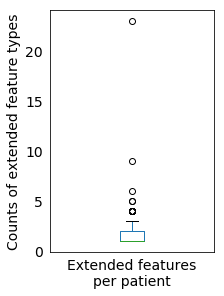

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure(figsize = (3, 4), constrained_layout=True)
ax = plt.subplot()
plt.tick_params(axis = 'both', which = 'both',
            top = False, bottom = False, right = False, left = False, 
            labeltop = False, labelbottom = True, labelright = False, labelleft = True)

p = tmp['patient_id'].value_counts().plot.box()
plt.ylabel('Counts of extended feature types', fontsize=14)

ax.set_xticklabels(['Extended features\nper patient'], fontsize = 14)
ax.tick_params(axis='y', which='major', labelsize=14)

plt.show()

## Therapeutic sensitivity by evidence

In [55]:
tmp['patient_id']

4       KIRP-2K-A9WE
23      KIRP-2Z-A9J2
34      KIRP-2Z-A9J5
53      KIRP-2Z-A9J7
56      KIRP-2Z-A9J8
            ...     
5051         TP_2060
5053         TP_2060
5066         TP_2061
5078         TP_2061
5090         TP_2064
Name: patient_id, Length: 557, dtype: object

In [56]:
tmp = df[df['sensitive_predictive_implication'].notnull()]
tmp['sensitive_predictive_implication'].value_counts()

evidence_map = {
    'FDA-Approved': 0,
    'Guideline': 1,
    'Clinical trial': 2,
    'Clinical evidence': 3,
    'Preclinical': 4,
    'Inferential': 5
}

tmp['evidence_map'] = tmp['sensitive_predictive_implication'].replace(evidence_map)
tmp = (tmp
 .loc[:, ['patient_id', 'sensitive_predictive_implication', 'evidence_map']]
 .sort_values('evidence_map')
 .drop_duplicates(subset='patient_id', keep='first')
)

idx_mel = tmp['patient_id'].str.contains('MEL-IPI')
idx_kirp = tmp['patient_id'].str.contains('KIRP')
idx_os = tmp['patient_id'].str.contains('Osteosarcoma')
idx_prad = tmp.index.difference(idx_mel[idx_mel].index.union(idx_kirp[idx_kirp].index).union(idx_os[idx_os].index))
tmp_mel_vcs = tmp[idx_mel]['sensitive_predictive_implication'].value_counts()
tmp_mel_vcs

/miniconda3/envs/moalmanac-paper/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


FDA-Approved         70
Clinical evidence    16
Preclinical          10
Guideline             9
Inferential           1
Clinical trial        1
Name: sensitive_predictive_implication, dtype: int64

In [57]:
tmp_mel_vcs['FDA-Approved'] + tmp_mel_vcs['Guideline']

79

In [58]:
tmp_su2c_vcs = tmp.loc[idx_prad, :]['sensitive_predictive_implication'].value_counts()
tmp_su2c_vcs

Guideline         74
FDA-Approved      35
Preclinical       28
Clinical trial     4
Inferential        1
Name: sensitive_predictive_implication, dtype: int64

In [59]:
tmp_su2c_vcs['FDA-Approved'] + tmp_su2c_vcs['Guideline']

109

In [60]:
tmp_kirp_vcs = tmp[idx_kirp]['sensitive_predictive_implication'].value_counts()
tmp_kirp_vcs

Guideline            19
Inferential          18
FDA-Approved         17
Preclinical          14
Clinical evidence    11
Clinical trial        4
Name: sensitive_predictive_implication, dtype: int64

In [61]:
tmp_kirp_vcs['FDA-Approved'] + tmp_kirp_vcs['Guideline']

36

In [62]:
tmp_os_vcs = tmp[idx_os]['sensitive_predictive_implication'].value_counts()
tmp_os_vcs

Preclinical          16
Inferential           8
FDA-Approved          7
Guideline             4
Clinical evidence     3
Clinical trial        2
Name: sensitive_predictive_implication, dtype: int64

In [63]:
tmp_os_vcs['FDA-Approved'] + tmp_os_vcs['Guideline']

11

In [64]:
(
tmp_mel_vcs['FDA-Approved'] + tmp_mel_vcs['Guideline'] +
tmp_su2c_vcs['FDA-Approved'] + tmp_su2c_vcs['Guideline'] +
tmp_kirp_vcs['FDA-Approved'] + tmp_kirp_vcs['Guideline'] + 
tmp_os_vcs['FDA-Approved'] + tmp_os_vcs['Guideline']
)

235

In [65]:
110 + 150 + 100 + 59

419

In [66]:
tmp['sensitive_predictive_implication'].value_counts()

FDA-Approved         129
Guideline            106
Preclinical           68
Clinical evidence     30
Inferential           28
Clinical trial        11
Name: sensitive_predictive_implication, dtype: int64

In [67]:
patients_fda_guideline = tmp[tmp['sensitive_predictive_implication'].isin(['FDA-Approved', 'Guideline'])]['patient_id'].tolist()
patients_all = tmp['patient_id'].tolist()
patients_fda_guideline_clinical = tmp[tmp['sensitive_predictive_implication'].isin(['FDA-Approved', 'Guideline', 'Clinical trial', 'Clinical evidence'])]['patient_id'].tolist()
patients_preclinical = tmp[tmp['sensitive_predictive_implication'].isin(['Preclinical'])]['patient_id'].tolist()
patients_inferential = tmp[tmp['sensitive_predictive_implication'].isin(['Inferential'])]['patient_id'].tolist()



In [68]:
patients_all = tmp['patient_id'].tolist()

In [69]:
tmp = df[df['sensitive_predictive_implication'].notnull() & df['feature_type'].isin(['Somatic variant', 'Somatic copy number'])]
tmp['sensitive_predictive_implication'].value_counts()

evidence_map = {
    'FDA-Approved': 0,
    'Guideline': 1,
    'Clinical trial': 2,
    'Clinical evidence': 3,
    'Preclinical': 4,
    'Inferential': 5
}

tmp['evidence_map'] = tmp['sensitive_predictive_implication'].replace(evidence_map)
tmp = (tmp
 .loc[:, ['patient_id', 'sensitive_predictive_implication', 'evidence_map']]
 .sort_values('evidence_map')
 .drop_duplicates(subset='patient_id', keep='first')
)

patients_fda_guideline_somatic = (tmp[
    tmp['sensitive_predictive_implication'].isin(['FDA-Approved', 'Guideline'])]['patient_id'].tolist())

/miniconda3/envs/moalmanac-paper/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [70]:
tmp_patients = pd.Index(patients_fda_guideline).difference(pd.Index(patients_fda_guideline_somatic))
print(tmp_patients)
print(tmp_patients.shape)

Index(['KIRP-2Z-A9JJ', 'MEL-IPI_Pat06', 'Osteosarcoma-CCM201',
       'Osteosarcoma-IAS513', 'Osteosarcoma-NCF101', 'Osteosarcoma-RCP466',
       'Osteosarcoma-SJDOSTEOS009', 'Osteosarcoma-WABS378',
       'PROS01448-1115244', 'PROS01448-6115250', 'SC_9034', 'SC_9066',
       'SC_9086', 'TP_2032', 'TP_2054', 'TP_2060'],
      dtype='object')
(16,)


In [71]:
tmp = (df[df['patient_id'].isin(tmp_patients) 
          & df['sensitive_predictive_implication'].isin(['FDA-Approved', 'Guideline'])])
tmp

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
117,KIRP-2Z-A9JJ,EML4--ALK,Putatively Actionable,NaN,1,KIRP,Guideline,NaN,NaN,NaN,Rearrangement,EML4--ALK
871,MEL-IPI_Pat06,COL1A1--TGM2,Investigate Actionability,NaN,1,MEL,Guideline,NaN,NaN,NaN,Rearrangement,COL1A1--TGM2
3513,Osteosarcoma-CCM201,COL1A1--MMP9,Investigate Actionability,NaN,1,OS,Guideline,NaN,NaN,NaN,Rearrangement,COL1A1--MMP9
3549,Osteosarcoma-IAS513,NTRK2--AUH,Investigate Actionability,NaN,1,OS,FDA-Approved,NaN,NaN,NaN,Rearrangement,NTRK2--AUH
3650,Osteosarcoma-NCF101,BRCA2.p.F1460fs.Germline,Investigate Actionability,NaN,1,OS,FDA-Approved,NaN,NaN,NaN,Germline,BRCA2 Germline
3671,Osteosarcoma-RCP466,COL1A1--USP6,Investigate Actionability,NaN,1,OS,Guideline,NaN,NaN,NaN,Rearrangement,COL1A1--USP6
3745,Osteosarcoma-SJDOSTEOS009,BRCA2.p.T2412fs.Germline,Investigate Actionability,NaN,1,OS,FDA-Approved,NaN,NaN,Pathogenic,Germline,BRCA2 Germline
3850,Osteosarcoma-WABS378,ABL1--TTF1,Investigate Actionability,NaN,1,OS,FDA-Approved,NaN,NaN,NaN,Rearrangement,ABL1--TTF1
3912,PROS01448-1115244,COL1A1--KLK3,Investigate Actionability,NaN,1,SU2C,Guideline,NaN,NaN,NaN,Rearrangement,COL1A1--KLK3
3981,PROS01448-6115250,BRCA2.p.L698fs.Germline,Investigate Actionability,NaN,1,SU2C,FDA-Approved,NaN,NaN,Pathogenic,Germline,BRCA2 Germline


In [72]:
tmp['feature_string'].value_counts()

COL1A1--LRP1                1
MT-RNR2--COL1A1             1
BRCA2.p.F1460fs.Germline    1
COL1A1--MMP9                1
COL1A1--USP6                1
CDK5RAP2--COL1A1            1
COL1A1--C1R                 1
COL1A1--BCL2L2-PABPN1       1
BRCA2.p.S1882*.Germline     1
EML4--ALK                   1
BRCA2.p.T2412fs.Germline    1
COL1A1--CPE                 1
COL1A1--KLK3                1
BRCA2.p.L698fs.Germline     1
NTRK2--AUH                  1
COL1A1--MT-CO2              1
COL1A1--TGM2                1
ABL1--TTF1                  1
Name: feature_string, dtype: int64

In [73]:
tmp[tmp['feature_string'].str.contains('NTRK')]

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
3549,Osteosarcoma-IAS513,NTRK2--AUH,Investigate Actionability,NaN,1,OS,FDA-Approved,NaN,NaN,NaN,Rearrangement,NTRK2--AUH


In [74]:
(pd.Index(patients_preclinical)
 .difference(pd.Index(patients_fda_guideline_clinical))
 .shape
)

(68,)

In [75]:
(pd.Index(patients_inferential)
 .difference(pd.Index(patients_fda_guideline_clinical))
 .difference(pd.Index(patients_preclinical))
 .shape
)

(28,)

In [76]:
(df[df['patient_id'].isin(patients_preclinical) & df['sensitive_predictive_implication'].eq('Preclinical')]['feature_string']
 .value_counts()
 .head()
)

PTEN.Deletion          18
CDKN2A.Deletion        12
TMPRSS2--ERG           10
AURKB.Amplification     4
FGFR2.Deletion          3
Name: feature_string, dtype: int64

## Table of sample counts by assertion type, evidence, and match

In [77]:
(df[(df['cohort'].eq('KIRP') &
 df['almanac_bin'].isin(['Investigate Actionability', 'Putatively Actionable']) &
 df['prognostic_predictive_implication'].isin(['Guideline'])
)]
#.shape
#['patient_id'].value_counts()
['feature_type'].value_counts()
)

Somatic variant        17
Germline                6
Somatic copy number     3
Name: feature_type, dtype: int64

In [78]:
df['patient_id']

0       KIRP-2K-A9WE
1       KIRP-2K-A9WE
2       KIRP-2K-A9WE
3       KIRP-2K-A9WE
4       KIRP-2K-A9WE
            ...     
5086         TP_2064
5087         TP_2064
5088         TP_2064
5089         TP_2064
5090         TP_2064
Name: patient_id, Length: 5091, dtype: object

In [79]:
columns = df.columns[df.columns.str.contains('predictive_implication')]

evidence_columns = ['FDA-Approved', 'Guideline', 'Clinical trial', 'Clinical evidence', 'Preclinical', 'Inferential']
match_columns = ['Putatively Actionable', 'Investigate Actionability', 'Biologically Relevant']
types_columns = ['Somatic variant', 'Somatic copy number', 'Germline', 'Rearrangement', 'Mutational signature', 'Tumor mutational burden', 'Aneuploidy']

outname = 'retrospective.feature_types_by_evidence.xlsx'

with pd.ExcelWriter(outname) as writer: 
    for label, group in df.groupby('cohort'):
        for column in columns:
            sheetname = '{} {} profile counts'.format(label, column.split('_')[0])
            (
                df[df[column].isin(evidence_columns) & df['cohort'].eq(label)]
                .loc[:, ['patient_id', 'feature_type', column]]
                .drop_duplicates()
                .pivot_table(index='feature_type', columns=column, values='patient_id', aggfunc=lambda x: len(x.unique()))
                .reindex(evidence_columns, axis=1)
                .reindex(types_columns)
                .fillna(0)
                .astype(int)
                .to_excel(writer, sheet_name=sheetname)
            )

## In conclusion

In [80]:
n_size = {
    'KIRP': 100,
    'MEL': 110,
    'SU2C': 150,
    'OS': 59
}

tmp = df[df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])]
for label, group in tmp.groupby('cohort'):
    print(label, 
          group['patient_id'].drop_duplicates().shape[0], 
          round(group['patient_id'].drop_duplicates().shape[0] / n_size[label], 3)
         )

KIRP 85 0.85
MEL 110 1.0
OS 51 0.864
SU2C 149 0.993


In [81]:
tmp = df[df['phial_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])]
for label, group in tmp.groupby('cohort'):
    print(label, 
          group['patient_id'].drop_duplicates().shape[0], 
          round(group['patient_id'].drop_duplicates().shape[0] / n_size[label], 3)
         )

KIRP 27 0.27
MEL 101 0.918
OS 36 0.61
SU2C 131 0.873


## Figure 2 caption

In [82]:
idx_v = df['feature_type'].eq('Somatic variant')
idx_cn = df['feature_type'].eq('Somatic copy number')
idx_a = df['almanac_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])
idx_p = df['phial_bin'].fillna('').isin(['Putatively Actionable', 'Investigate Actionability'])

idx = (idx_a) & (idx_v | idx_cn)
tmp = df[idx]['patient_id'].drop_duplicates()
print(tmp.shape)

idx = (idx_p) & (idx_v | idx_cn)
tmp = df[idx]['patient_id'].drop_duplicates()
print(tmp.shape)

(365,)
(295,)


In [83]:
df[idx & df['almanac_bin'].isnull()]

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
27,KIRP-2Z-A9J3,FGFR1.Deletion,NaN,Investigate Actionability,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,FGFR1 Del
90,KIRP-2Z-A9JE,SMARCA4.Deletion,NaN,Investigate Actionability,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,SMARCA4 Del
91,KIRP-2Z-A9JG,ABL1.Deletion,NaN,Investigate Actionability,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,ABL1 Del
168,KIRP-2Z-A9JP,SMARCA4.Deletion,NaN,Investigate Actionability,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,SMARCA4 Del
189,KIRP-2Z-A9JR,EWSR1.Deletion,NaN,Investigate Actionability,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,EWSR1 Del
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,TP_2001,MITF.Deletion,NaN,Investigate Actionability,1,SU2C,NaN,NaN,NaN,NaN,Somatic copy number,MITF Del
5010,TP_2010,TMPRSS2.Deletion,NaN,Investigate Actionability,1,SU2C,NaN,NaN,NaN,NaN,Somatic copy number,TMPRSS2 Del
5016,TP_2020,AR.p.Q58L,NaN,Investigate Actionability,1,SU2C,NaN,NaN,NaN,NaN,Somatic variant,AR
5021,TP_2020,NOTCH2.Deletion,NaN,Investigate Actionability,1,SU2C,NaN,NaN,NaN,NaN,Somatic copy number,NOTCH2 Del


In [84]:
unique_patients_preclinical = (pd.Index(patients_preclinical)
                               .difference(pd.Index(patients_fda_guideline_clinical))
                              )

In [85]:
(
    df[df['patient_id'].isin(
        pd.Index(patients_preclinical)
        .difference(pd.Index(patients_fda_guideline_clinical))
    )]
 .loc[:, ['patient_id', 'cohort']]
 .drop_duplicates()
 .loc[:, 'cohort']
 .value_counts()
)

SU2C    28
OS      16
KIRP    14
MEL     10
Name: cohort, dtype: int64

In [86]:
df

,patient_id,feature_string,almanac_bin,phial_bin,sum,cohort,sensitive_predictive_implication,resistance_predictive_implication,prognostic_predictive_implication,clinvar,feature_type,feature_str_simple
0,KIRP-2K-A9WE,AR.p.QQQQQ73del.Germline,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Germline,AR Germline
1,KIRP-2K-A9WE,ASXL1.Amplification,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Somatic copy number,ASXL1 Amp
2,KIRP-2K-A9WE,AURKA.Amplification,Putatively Actionable,NaN,1,KIRP,Preclinical,NaN,Preclinical,NaN,Somatic copy number,AURKA Amp
3,KIRP-2K-A9WE,COSMIC Signature 12,Biologically Relevant,NaN,1,KIRP,NaN,NaN,NaN,NaN,Mutational signature,COSMIC Signature 12
4,KIRP-2K-A9WE,COSMIC Signature 4,Investigate Actionability,NaN,1,KIRP,Inferential,NaN,NaN,NaN,Mutational signature,COSMIC Signature 4
...,...,...,...,...,...,...,...,...,...,...,...,...
5086,TP_2064,COSMIC Signature 1,Biologically Relevant,NaN,1,SU2C,NaN,NaN,NaN,NaN,Mutational signature,COSMIC Signature 1
5087,TP_2064,COSMIC Signature 6,Biologically Relevant,NaN,1,SU2C,NaN,NaN,NaN,NaN,Mutational signature,COSMIC Signature 6
5088,TP_2064,MPL.p.A134T,Investigate Actionability,Biologically Relevant,2,SU2C,Preclinical,NaN,NaN,NaN,Somatic variant,MPL
5089,TP_2064,TP53.p.H179R,Investigate Actionability,Investigate Actionability,2,SU2C,NaN,Guideline,Guideline,NaN,Somatic variant,TP53


In [87]:
!mkdir -p ../../tables/supplementary-table-03

outname = '../../tables/supplementary-table-03/supplementary-table-3.xlsx'
with pd.ExcelWriter(outname) as writer:
    df.drop('sum', axis=1).to_excel(writer, sheet_name='MOAlmanac & PHIAL calls', index=False)
    counts = pd.read_csv('retrospective.counts-by-category.txt', sep='\t')
    counts.to_excel(writer, sheet_name='summarized counts', index=False)